***Importar Funções***

In [13]:
from src.utils_dataset import analyze_label_distribution
from src.dataset_gen_load import rodar_dataset_torch
from src.utils_plot import plot_images_from_dataset, plot_single_metric, plot_dual_metric
from src.utils_model import load_history, listar_modelos, print_history_values, avaliar_modelo_no_teste, carregar_modelo_mais_recente, print_last_history_values
import torch
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

from src.gen_models import ModelFactory_Tiny
import os

***Load Dataset***

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE_H, IMAGE_SIZE_W = 96,96
CHANNELS = 3
input_shape = (IMAGE_SIZE_H, IMAGE_SIZE_W, CHANNELS)
# train_ds, val_ds, test_ds = rodar_dataset_torch(input_shape, BATCH_SIZE)

***Verificar Distribuição em Partições***

In [3]:
# analyze_label_distribution(train_ds)
# analyze_label_distribution(val_ds)
# analyze_label_distribution(test_ds)

***Carregar modelos e historicos gerados***

*2 Classes*

In [4]:
# Listar modelos disponíveis
train_ds2, val_ds2, test_ds2 = rodar_dataset_torch(input_shape, BATCH_SIZE, caminho_base =os.path.join('2_Classes','datasets_utilizados'))
modelos2 = listar_modelos(os.path.join('2_Classes','modelos'))
# modelos = listar_modelos(os.path.join('modelos'))

histories2 = {}
modelos_carregados2 = {}

for modl in modelos2:
    print(f"\n🔄 Processando modelo: {modl}")
    try:
        # Carregar histórico
        histories2[modl] = load_history('2_Classes', modl)
        print(f"✅ Histórico carregado para {modl}")
    except Exception as e:
        print(f"⚠️ Erro ao carregar histórico para {modl}: {e}")
        histories2[modl] = None

    try:
        # Carregar modelo mais recente
        modelo2, otimizador2, config2 = carregar_modelo_mais_recente(modl, modelo_dir = os.path.join('2_Classes',"modelos", modl), classe='2_Classes')
        modelos_carregados2[modl] = {
            'historico': histories2[modl],
            'modelo': modelo2,
            'otimizador': otimizador2,
            'config': config2
        }
        print(f"✅ Modelo mais recente carregado para {modl}")
    except Exception as e:
        print(f"⚠️ Erro ao carregar o modelo: {e}")
        modelos_carregados2[modl] = {
            'historico': histories2[modl],
            'modelo': modelo2,
            'otimizador': otimizador2,
            'config': config2
        }




Dataset carregado de 2_Classes\datasets_utilizados\train_dataset.pkl.
Dataset carregado de 2_Classes\datasets_utilizados\val_dataset.pkl.
Dataset carregado de 2_Classes\datasets_utilizados\test_dataset.pkl.

🔄 Processando modelo: cct
✅ Histórico carregado para cct
✅ Modelo carregado com sucesso da arquitetura: cct
📂 Modelo mais recente carregado: modelo_final_epoca_100.pth
✅ Modelo mais recente carregado para cct

🔄 Processando modelo: cvt
✅ Histórico carregado para cvt
⚠️ Erro ao carregar o modelo: loaded state dict contains a parameter group that doesn't match the size of optimizer's group

🔄 Processando modelo: efficientnet
✅ Histórico carregado para efficientnet
✅ Modelo carregado com sucesso da arquitetura: efficientnet
📂 Modelo mais recente carregado: modelo_final_epoca_100.pth
✅ Modelo mais recente carregado para efficientnet

🔄 Processando modelo: resnet10
✅ Histórico carregado para resnet10
✅ Modelo carregado com sucesso da arquitetura: resnet10
📂 Modelo mais recente carregado

*4 Classes*

In [5]:
# Listar modelos disponíveis
# train_ds, val_ds, test_ds = rodar_dataset_torch(input_shape, BATCH_SIZE, caminho_base =os.path.join('datasets_utilizados'))
# modelos = listar_modelos(os.path.join('modelos'))

train_ds, val_ds, test_ds = rodar_dataset_torch(input_shape, BATCH_SIZE, caminho_base =os.path.join('4_Classes','datasets_utilizados'))
modelos = listar_modelos(os.path.join('4_Classes','modelos'))

histories = {}
modelos_carregados = {}



for modl in modelos:
    print(f"\n🔄 Processando modelo: {modl}")
    try:
        # Carregar histórico
        histories[modl] = load_history('4_Classes', modl)
        print(f"✅ Histórico carregado para {modl}")
    except Exception as e:
        print(f"⚠️ Erro ao carregar histórico para {modl}: {e}")
        histories[modl] = None

        

    try:
        # Carregar modelo mais recente
        modelo_dir = os.path.join('4_Classes',"modelos", modl)
        modelo, otimizador, config = carregar_modelo_mais_recente(modelo_nome = modl, modelo_dir = modelo_dir)
        
        modelos_carregados[modl] = {
            'historico': histories[modl],
            'modelo': modelo,
            'otimizador': otimizador,
            'config': config
        }
        print(f"✅ Modelo mais recente carregado para {modl}")
    except Exception as e:
        print(f"⚠️ Erro ao carregar o modelo: {e}")
        modelos_carregados[modl] = {
            'historico': histories[modl],
            'modelo': modelo,
            'otimizador': otimizador,
            'config': config
        }




Dataset carregado de 4_Classes\datasets_utilizados\train_dataset.pkl.
Dataset carregado de 4_Classes\datasets_utilizados\val_dataset.pkl.
Dataset carregado de 4_Classes\datasets_utilizados\test_dataset.pkl.

🔄 Processando modelo: cct
✅ Histórico carregado para cct
✅ Modelo carregado com sucesso da arquitetura: cct
📂 Modelo mais recente carregado: modelo_final_epoca_100.pth
✅ Modelo mais recente carregado para cct

🔄 Processando modelo: cvt
✅ Histórico carregado para cvt
⚠️ Erro ao carregar o modelo: loaded state dict contains a parameter group that doesn't match the size of optimizer's group

🔄 Processando modelo: efficientnet
✅ Histórico carregado para efficientnet
✅ Modelo carregado com sucesso da arquitetura: efficientnet
📂 Modelo mais recente carregado: modelo_final_epoca_100.pth
✅ Modelo mais recente carregado para efficientnet

🔄 Processando modelo: resnet10
✅ Histórico carregado para resnet10
✅ Modelo carregado com sucesso da arquitetura: ResNet10ViT
📂 Modelo mais recente carreg

***Verificar Histórico de Treinamento***

In [6]:
for modl in modelos2:
    print_history_values(modelos_carregados2[modl]['historico'], modl)

for modl in modelos:
    print_history_values(modelos_carregados[modl]['historico'], modl)

--- cct History ---
train_loss: [0.7337771972020467, 0.6947345693906148, 0.669691801071167, 0.6504483262697855, 0.6280740380287171, 0.6049581845601399, 0.5718421260515849, 0.542219360669454, 0.5117497046788534, 0.48546693921089173, 0.4610991239547729, 0.4410011609395345, 0.4199374576409658, 0.41238219738006593, 0.4041760345300039, 0.38394468029340106, 0.36406780580679576, 0.37357311248779296, 0.347195636232694, 0.34964646498362223, 0.341746187210083, 0.32858177423477175, 0.3322346101204554, 0.3100526968638102, 0.3054331203301748, 0.30340631008148194, 0.2942692150672277, 0.28327204783757526, 0.285728195309639, 0.2726593067248662, 0.2813950111468633, 0.2745566725730896, 0.26998936633268994, 0.26152880787849425, 0.26742475032806395, 0.2486079494158427, 0.2375962257385254, 0.2452416718006134, 0.24174733559290568, 0.23626484821240107, 0.23677578965822857, 0.22815822462240856, 0.2290143221616745, 0.23521983126799265, 0.22770358373721442, 0.21771121223767598, 0.22248682727416355, 0.2275270973

In [7]:
# Para modelos de 2 classes
for modl in modelos2:
    print_last_history_values(modelos_carregados2[modl]['historico'], modl)

# Para modelos de 4 classes
for modl in modelos:
    print_last_history_values(modelos_carregados[modl]['historico'], modl)

--- Últimos valores do histórico para cct ---
train_loss: 0.1566007599234581
train_accuracy: 93.95833333333333
val_loss: 0.4081343859434128
val_accuracy: 90.625
--- Últimos valores do histórico para cvt ---
train_loss: 0.5040275315443675
train_accuracy: 77.70833333333333
val_loss: 0.9835615754127502
val_accuracy: 78.125
--- Últimos valores do histórico para efficientnet ---
train_loss: 0.27345072825749717
train_accuracy: 90.625
val_loss: 0.48742032051086426
val_accuracy: 95.3125
--- Últimos valores do histórico para resnet10 ---
train_loss: 0.04736493254701297
train_accuracy: 99.58333333333333
val_loss: 0.10234788805246353
val_accuracy: 100.0
--- Últimos valores do histórico para resnet10vit ---
train_loss: 0.003000840009190142
train_accuracy: 100.0
val_loss: 0.008404282154515386
val_accuracy: 100.0
--- Últimos valores do histórico para resnet18 ---
train_loss: 0.01143885546674331
train_accuracy: 100.0
val_loss: 0.08419386297464371
val_accuracy: 98.4375
--- Últimos valores do histórico

***Plotar Gráficos Treinamento e Validação***

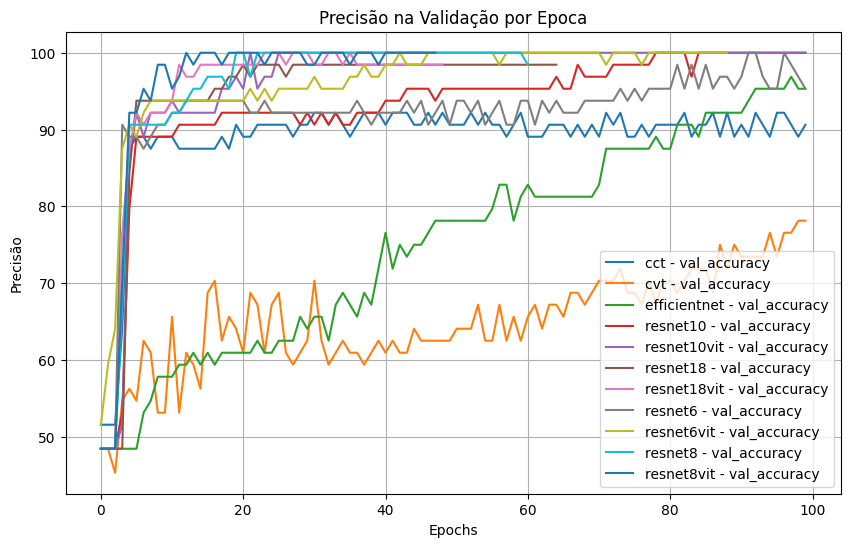

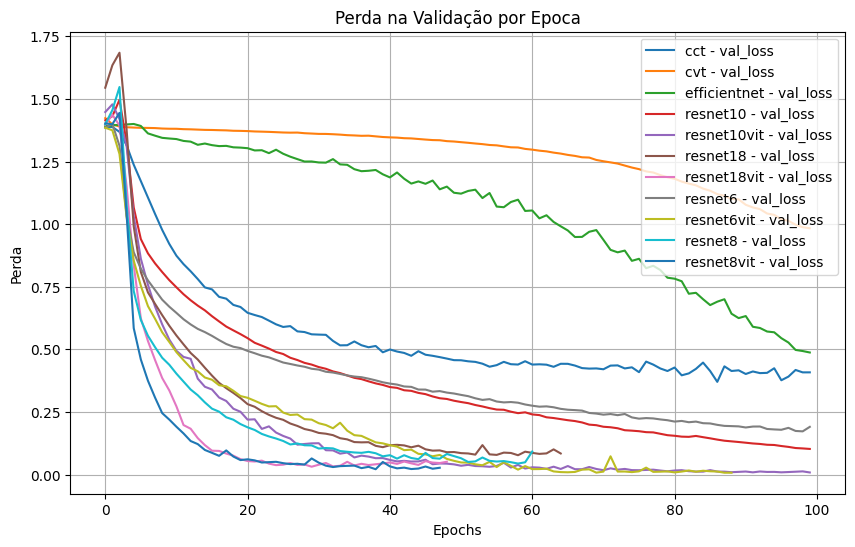

In [8]:
# plot_single_metric(2, histories2, 'train_accuracy', 'Precisão no Treinamento por Epoca', 'Precisão')
plot_single_metric(2, histories2, 'val_accuracy', 'Precisão na Validação por Epoca', 'Precisão')
# plot_single_metric(2, histories2, 'train_loss', 'Perda no Treinamento por Epoca', 'Perda')
plot_single_metric(2, histories2, 'val_loss', 'Perda na Validação por Epoca', 'Perda')
# plot_dual_metric(histories2, 'train_accuracy', 'train_loss', 'Precisão e Perda no Treinamento por Epoca', 'Precisão', 'Perda')
# plot_dual_metric(histories2, 'val_accuracy', 'val_loss', 'Precisão e Perda na Validação por Epoca', 'Precisão', 'Perda')

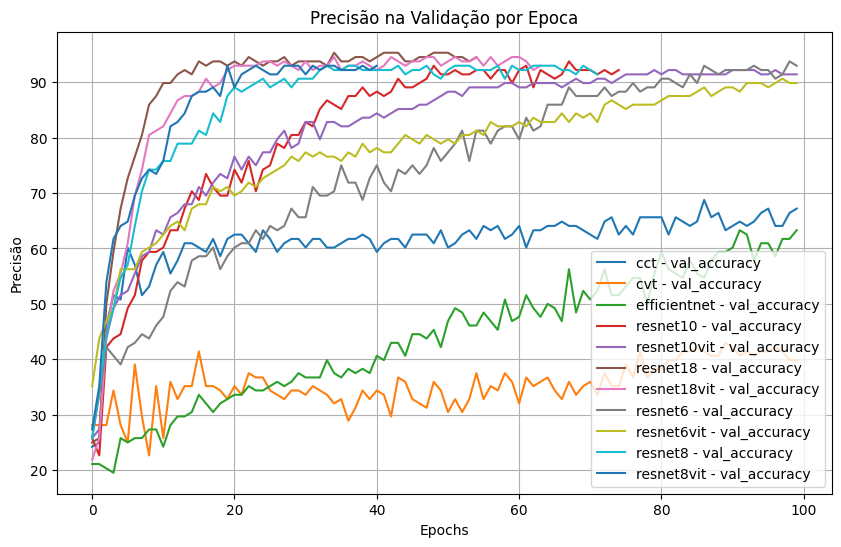

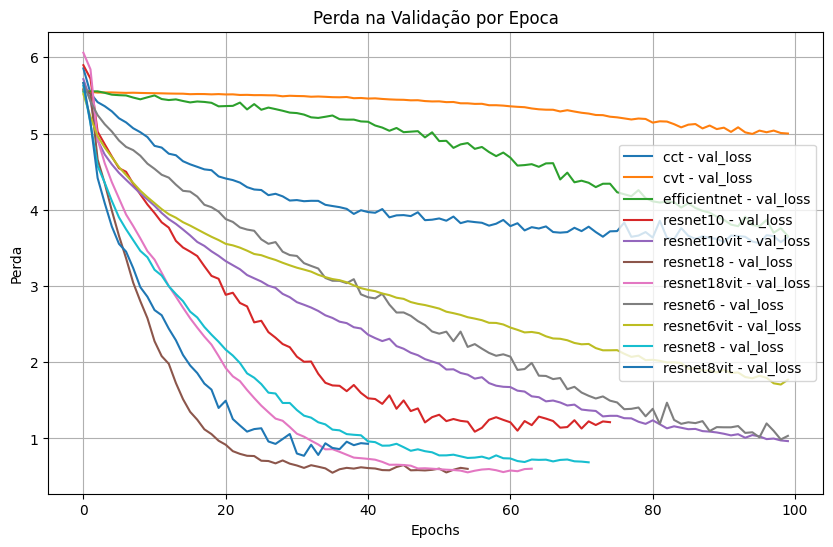

In [9]:
# plot_single_metric('miltiplo', histories, 'train_accuracy', 'Precisão no Treinamento por Epoca', 'Precisão')
plot_single_metric('miltiplo', histories, 'val_accuracy', 'Precisão na Validação por Epoca', 'Precisão')
# plot_single_metric('miltiplo', histories, 'train_loss', 'Perda no Treinamento por Epoca', 'Perda')
plot_single_metric('miltiplo', histories, 'val_loss', 'Perda na Validação por Epoca', 'Perda')
# plot_dual_metric(histories2, 'train_accuracy', 'train_loss', 'Precisão e Perda no Treinamento por Epoca', 'Precisão', 'Perda')
# plot_dual_metric(histories2, 'val_accuracy', 'val_loss', 'Precisão e Perda na Validação por Epoca', 'Precisão', 'Perda')

***Teste de Rede Neual Final***

In [10]:
print('2 Classes')
selected_classes2 = ['1_normal', '2_cataract']
for modl in modelos2:
    if modelo2:
        avaliar_modelo_no_teste(modelos_carregados2[modl]['modelo'], test_ds2, modl, selected_classes2, plot_conf=False)


selected_classes4 = ['1_normal', '2_cataract','2_glaucoma', '3_retina_disease']
print('4 Classes')
for modl in modelos:
    if modelo:
        avaliar_modelo_no_teste(modelos_carregados[modl]['modelo'], test_ds, modl, selected_classes4, plot_conf=False)

2 Classes
--- Treinamento cct ---
📊 Teste - Perda: 0.1237, Precisão: 96.88%, Sensibilidade: 0.9676, Especificidade: 0.9676, Tempo Medio Inferencia (s): 2.118849s
--- Treinamento cvt ---
📊 Teste - Perda: 0.1099, Precisão: 96.88%, Sensibilidade: 0.9615, Especificidade: 0.9615, Tempo Medio Inferencia (s): 2.351898s
--- Treinamento efficientnet ---
📊 Teste - Perda: 0.2641, Precisão: 95.31%, Sensibilidade: 0.9545, Especificidade: 0.9545, Tempo Medio Inferencia (s): 0.619051s
--- Treinamento resnet10 ---
📊 Teste - Perda: 0.0308, Precisão: 100.00%, Sensibilidade: 1.0000, Especificidade: 1.0000, Tempo Medio Inferencia (s): 0.228669s
--- Treinamento resnet10vit ---
📊 Teste - Perda: 0.0308, Precisão: 100.00%, Sensibilidade: 1.0000, Especificidade: 1.0000, Tempo Medio Inferencia (s): 0.259757s
--- Treinamento resnet18 ---
📊 Teste - Perda: 0.0308, Precisão: 100.00%, Sensibilidade: 1.0000, Especificidade: 1.0000, Tempo Medio Inferencia (s): 0.233643s
--- Treinamento resnet18vit ---
📊 Teste - Perda:

Plot Matrizes confusão

In [ ]:
def plot_multiple_confusion_matrices(models_dict, test_ds, class_names, num_columns=2):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    unique_matrices = {}  # Para armazenar matrizes únicas e os modelos correspondentes
    correct_size = len(class_names)  # Número esperado de classes

    for model_name, model in models_dict.items():
        model.eval()
        all_labels, all_preds = [], []

        with torch.no_grad():
            for images, labels in test_ds:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(predicted.cpu().numpy())

        conf_matrix = confusion_matrix(all_labels, all_preds)

        # Verificar se a matriz tem o tamanho correto
        if conf_matrix.shape[0] != correct_size:
            print(f"⚠️ Modelo {model_name} ignorado (matriz de confusão {conf_matrix.shape[0]}x{conf_matrix.shape[1]}, esperado {correct_size}x{correct_size})")
            continue  # Ignora modelos com número incorreto de classes

        # Converter matriz em uma forma que permita identificação única
        conf_matrix_tuple = tuple(map(tuple, conf_matrix))

        if conf_matrix_tuple in unique_matrices:
            unique_matrices[conf_matrix_tuple].append(model_name)
        else:
            unique_matrices[conf_matrix_tuple] = [model_name]

    num_plots = len(unique_matrices)
    num_rows = (num_plots + num_columns - 1) // num_columns  # Calcula número de linhas necessárias

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(5 * num_columns, 5 * num_rows), constrained_layout=True)

    # Garantir que 'axes' seja uma matriz 2D, mesmo com um único gráfico
    axes = np.array(axes).reshape(num_rows, num_columns)

    # Converter tuplas de volta para arrays NumPy
    all_matrices = [np.array(conf_matrix_tuple) for conf_matrix_tuple in unique_matrices.keys()]
    
    # **Correção: calcular `vmin` e `vmax` corretamente**
    vmin = min(matrix.min() for matrix in all_matrices)
    vmax = max(matrix.max() for matrix in all_matrices)

    for ax, (conf_matrix_tuple, model_names) in zip(axes.flatten(), unique_matrices.items()):
        conf_matrix = np.array(conf_matrix_tuple)

        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                    xticklabels=class_names, yticklabels=class_names, ax=ax,
                    vmin=vmin, vmax=vmax, cbar=False, annot_kws={"size": 20})  # ❌ Remove a barra lateral de cores

        ax.set_xlabel("Predito", fontsize=14)
        ax.set_ylabel("Real", fontsize=14)
        ax.set_title(f"{', '.join(model_names)}", fontsize=16, pad=10)

        # Melhorar alinhamento das legendas
        ax.set_xticklabels(class_names, rotation=45, ha="right", fontsize=15)
        ax.set_yticklabels(class_names, rotation=0, fontsize=15)

    # Esconder subplots vazios (se houver)
    for j in range(len(unique_matrices), len(axes.flatten())):
        fig.delaxes(axes.flatten()[j])

    plt.show()



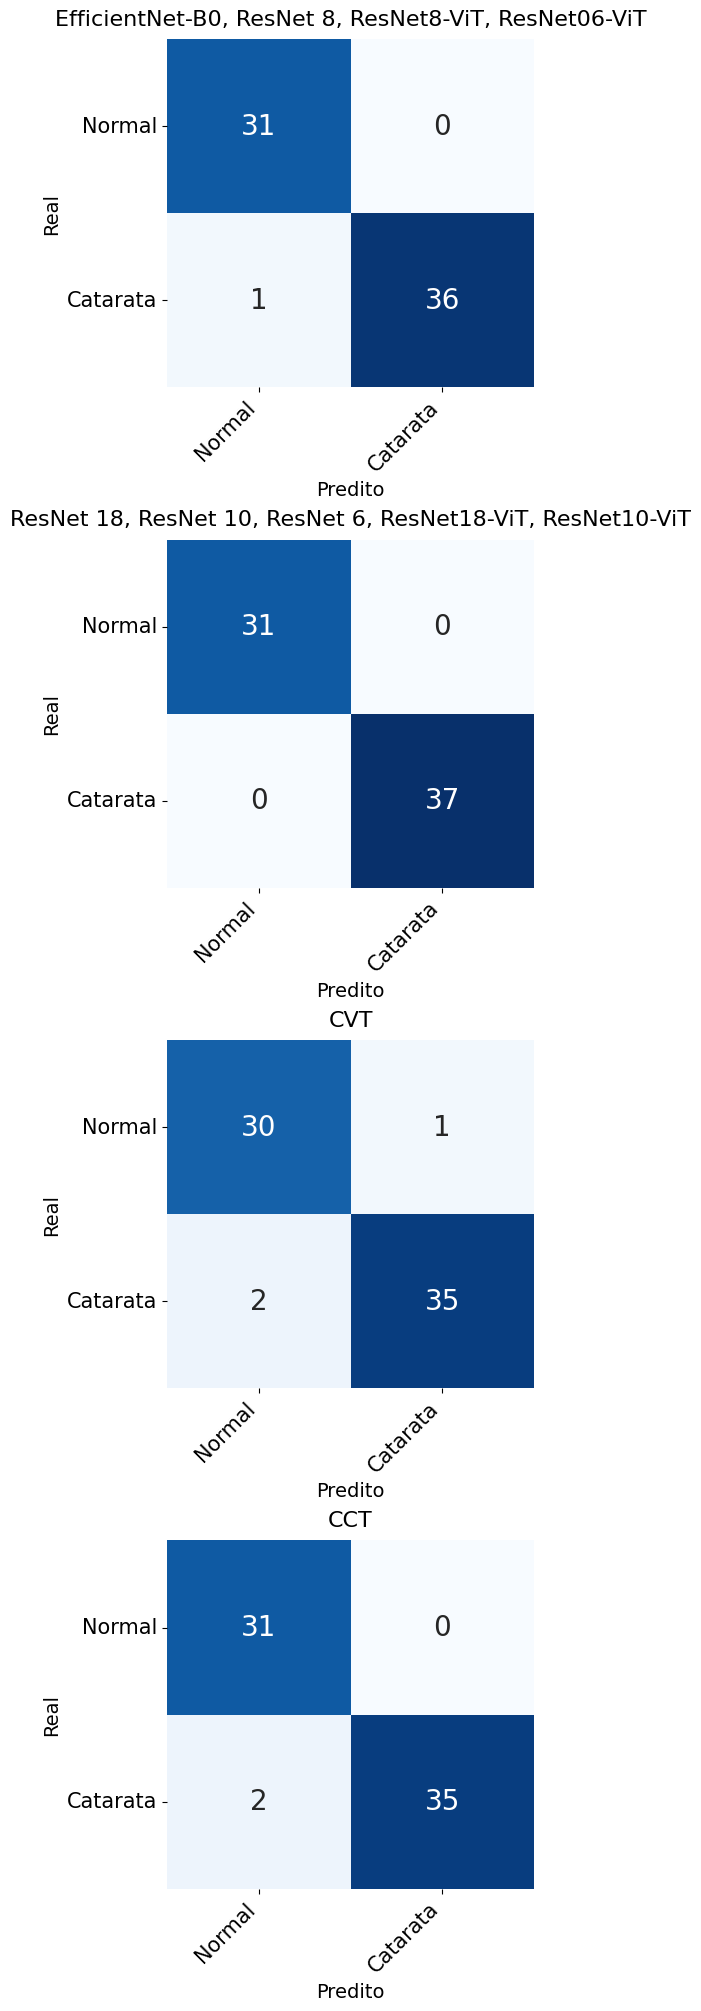

In [16]:
models_dict = {
"EfficientNet-B0":modelos_carregados2['efficientnet']["modelo"],
"ResNet 18":modelos_carregados2['resnet18']["modelo"],
"ResNet 10":modelos_carregados2['resnet10']["modelo"],
"ResNet 8":modelos_carregados2['resnet8']["modelo"],
"ResNet 6":modelos_carregados2['resnet6']["modelo"],
"CVT":modelos_carregados2['cvt']["modelo"],
"CCT":modelos_carregados2['cct']["modelo"],
"ResNet18-ViT":modelos_carregados2['resnet18vit']["modelo"],
"ResNet10-ViT":modelos_carregados2['resnet10vit']["modelo"],
"ResNet8-ViT":modelos_carregados2['resnet8vit']["modelo"],
"ResNet06-ViT":modelos_carregados2['resnet6vit']["modelo"],
}
selected_classes2 = ['Normal', 'Catarata']
plot_multiple_confusion_matrices(models_dict, test_ds2, selected_classes2, 1)

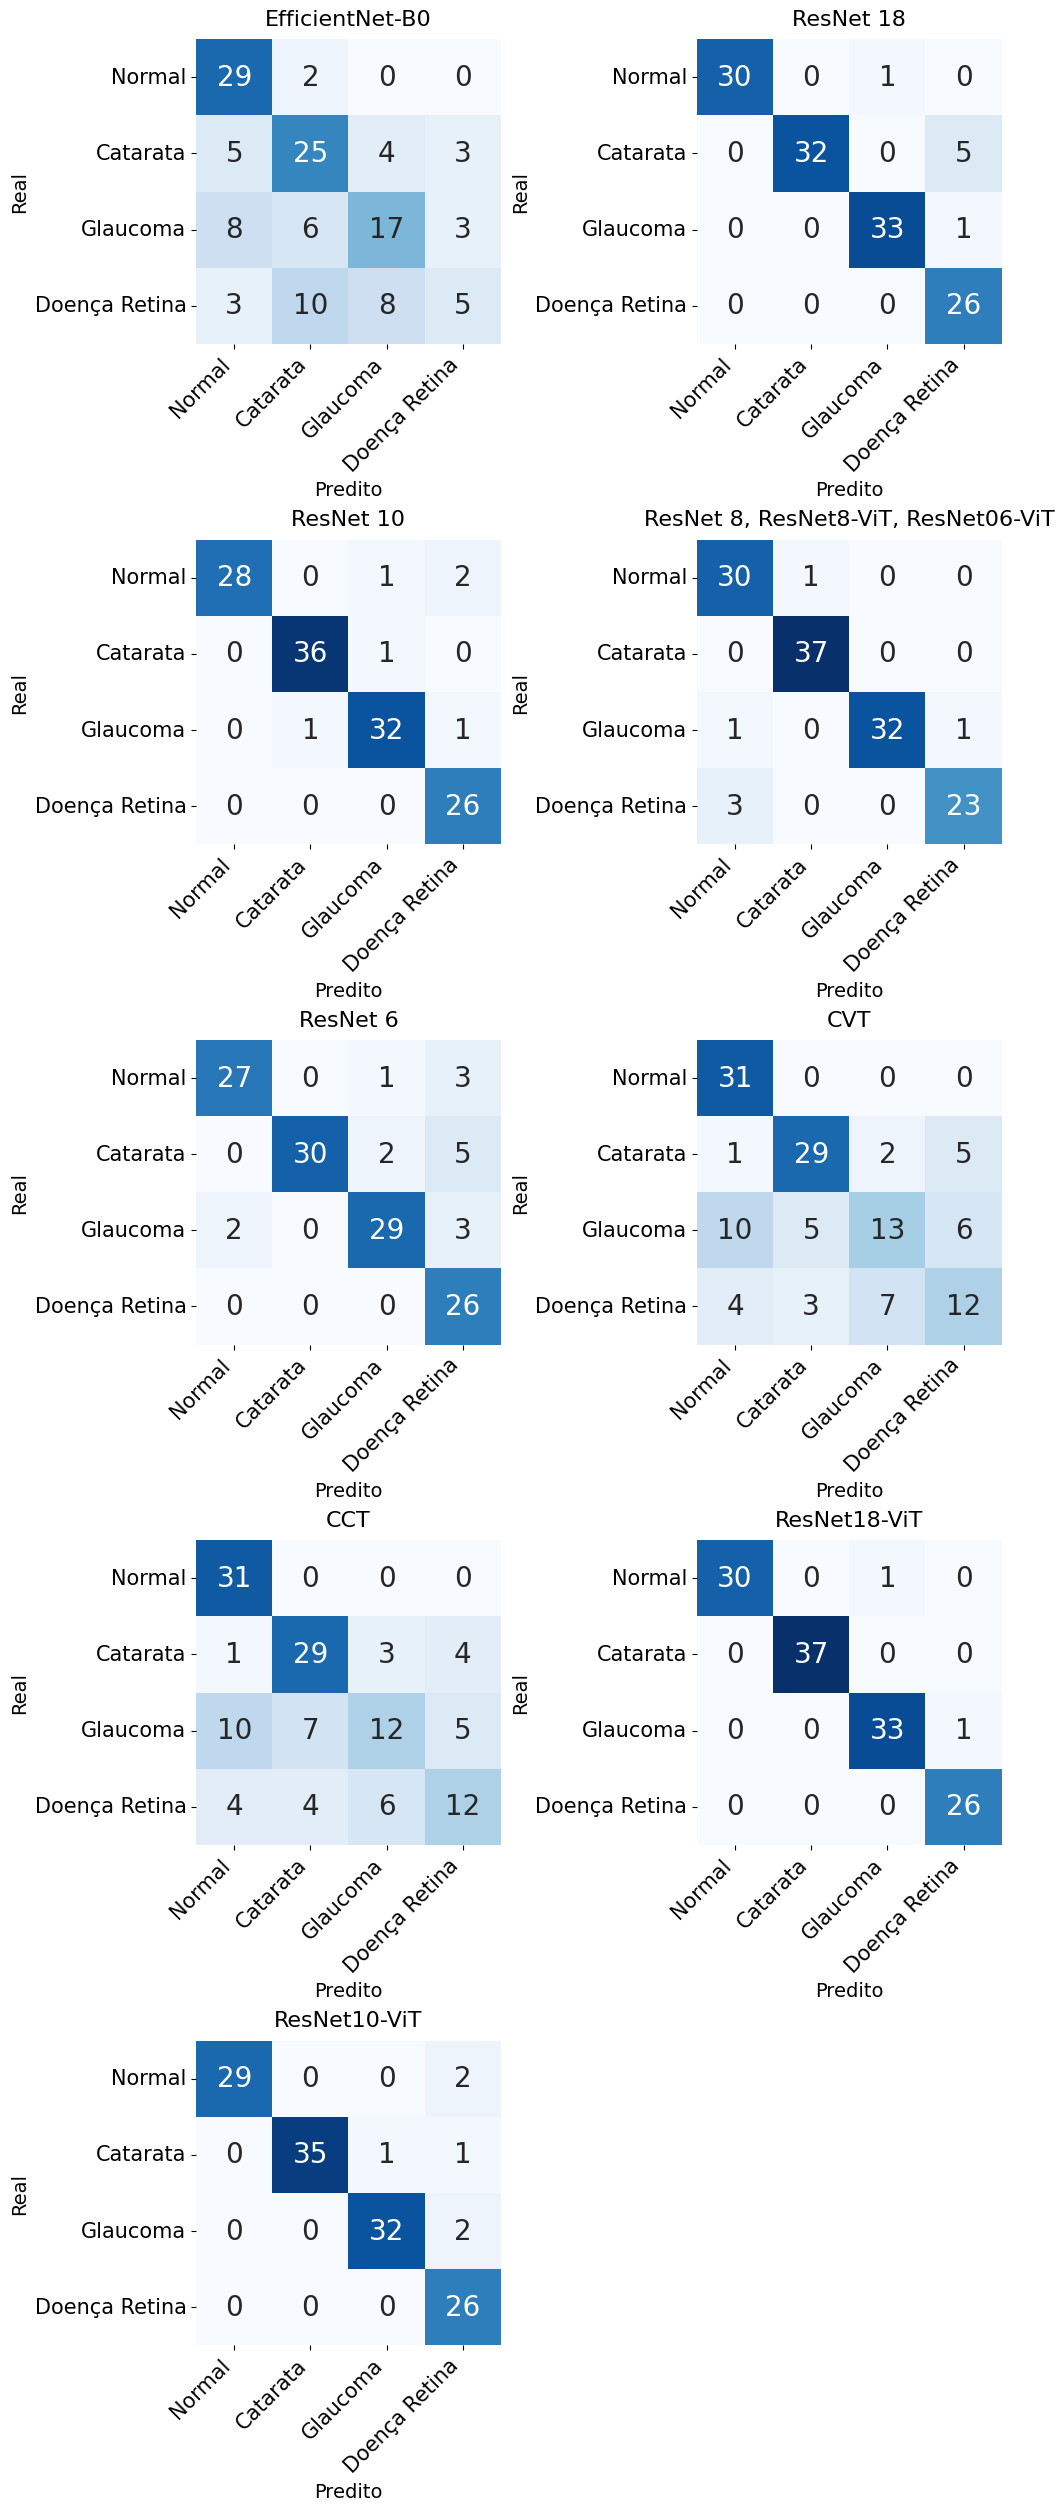

In [17]:
# Exemplo de uso:
models_dict = {
"EfficientNet-B0":modelos_carregados['efficientnet']["modelo"],
"ResNet 18":modelos_carregados['resnet18']["modelo"],
"ResNet 10":modelos_carregados['resnet10']["modelo"],
"ResNet 8":modelos_carregados['resnet8']["modelo"],
"ResNet 6":modelos_carregados['resnet6']["modelo"],
"CVT":modelos_carregados['cvt']["modelo"],
"CCT":modelos_carregados['cct']["modelo"],
"ResNet18-ViT":modelos_carregados['resnet18vit']["modelo"],
"ResNet10-ViT":modelos_carregados['resnet10vit']["modelo"],
"ResNet8-ViT":modelos_carregados['resnet8vit']["modelo"],
"ResNet06-ViT":modelos_carregados['resnet6vit']["modelo"],
}


selected_classes4 = ['Normal', 'Catarata','Glaucoma', 'Doença Retina']
plot_multiple_confusion_matrices(models_dict, test_ds, selected_classes4, 2)